# Data Analysis in Geoscience Remote Sensing Projects: Exercises 
## Solutions to tasks: Machine learning

Hendrik Andersen | contact: hendrik.andersen@kit.edu

__Task 1: Data__ 

Use the following webpage (https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset) to find some information on the data contained in the California housing data set.

... needs no explanation

In [1]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

cal_housing = fetch_california_housing()
X = cal_housing.data#[:n_data_points]
y = cal_housing.target#[:n_data_points]
X = np.append(X,np.random.rand(y.size,1),axis=1) # add a random variable to the data
cal_housing.feature_names.append('random') # add "random" as variable name
X_df = pd.DataFrame(X, columns=cal_housing.feature_names)
X_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,random
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,0.959669
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,0.099335
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,0.707166
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,0.297553
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,0.779245


In [3]:
n_iter = 5 #100 hereik andersen 
random_params = {'learning_rate': np.random.uniform(0,1,size = n_iter),
        'max_depth': np.random.randint(3, 10, n_iter),
        'n_estimators': np.random.randint(100, 500, n_iter),
        'subsample':np.random.uniform(0,1,size = n_iter),
        'min_samples_split': np.random.randint(3, 30, n_iter)
         }

gbrt_model = GradientBoostingRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

searchcv = RandomizedSearchCV(gbrt_model, random_params, n_iter = n_iter, n_jobs = -1, verbose = 1, cv = 5)
searchcv.fit(X_train, y_train) 
best_gbrt_model = searchcv.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


__Task 2: Separating training and test data__ 

Use the help page of "train_test_split" to see how a) reproducability in results can be achieved, and b) data sets can be split in different ways

> a) The argument "random_state" can be used to split the data "pseudo randomly", so if the same integer is provided (e.g.random_state=1), always the same data will be selected for training and testing data.

> b) The argument "shuffle" controls if data is shuffled (shuffle = True) or not. 

__Task 3.1: Fitting a model__

Check the sklearn website of the GBRT model https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html to find out about

1. the different hyperparameters ('parameters') of the GBRT model and their default values (especially those that are tuned below)
2. the different methods of the GBRT model
3. the different attributes of the GBRT model

... needs no explanation

__Task 3.2: Fitting a model__

1. Check out the sklearn website of RandomizedSearchCV and GridSearchCV to find out more about their parameters, attributes and methods.
2. Obviously, the hyperparameters n_estimators or max_depth are not driving the variability in the cross-validation score of the models observed. Which hyperparameters are driving the observed variability in cross-validation score? Can we use this information to fine-tune the range from which random data are drawn during hyperparameter tuning? 

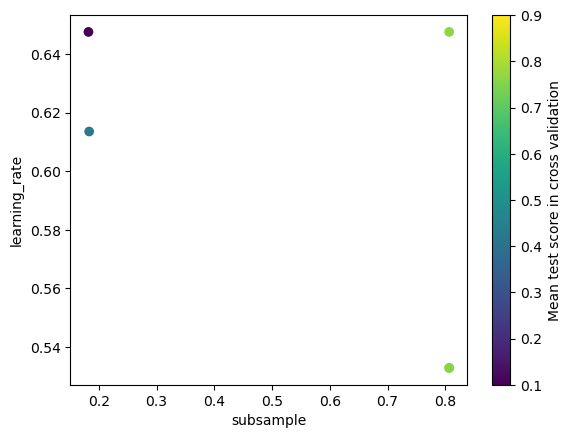

The hyperparameters subsample and learning rate seem to be driving the variability in model skill, with low subsample and high learning rate leading to poor model performance.


In [4]:
scores = searchcv.cv_results_["mean_test_score"]
subsample = searchcv.cv_results_["param_subsample"]
learning_rate = searchcv.cv_results_["param_learning_rate"]

# you can also visualize how two hyperparameter settings are related to the score at the same time
plt.scatter(subsample, learning_rate, c=scores, vmin=0.1, vmax=0.9)
plt.xlabel('subsample'); plt.ylabel('learning_rate')
plt.colorbar(label='Mean test score in cross validation')
plt.show()

print('The hyperparameters subsample and learning rate seem to be driving the variability in model skill, with low subsample and high learning rate leading to poor model performance.')


__Task 4__

1. Evaluate the linear regression model in the same manner as the tuned GBRT model is analyzed above. 
2. Compare the linear regression model with the tuned GBRT model - which one is better?

Linear model coefficient of determination with the built-in method "score": 0.60


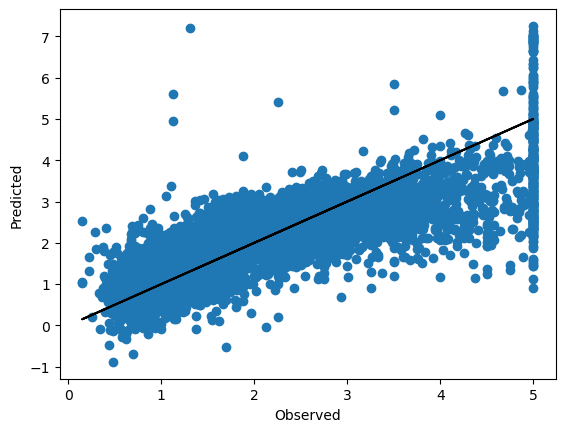

The linear model explains 60% of the variability in housing prices, whereas the GBRTs explain 84% of the variability.


In [7]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression() 
linear_model.fit(X_train, y_train)

print('Linear model coefficient of determination with the built-in method "score": %.2f' % linear_model.score(X_test,y_test))

plt.scatter(y_test, linear_model.predict(X_test))
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.plot(y_test, y_test, color = 'k')
plt.show()

print('The linear model explains 60% of the variability in housing prices, whereas the GBRTs explain 84% of the variability.')